In [1]:
#import data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
brain_df = pd.read_csv("brain_stroke.csv")
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# Identify missing values
brain_df.isna().sum()
# Handle missing values
df = brain_df.dropna();
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

C:\Users\Kavinda\AppData\Local\Temp\ipykernel_14688\966168736.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


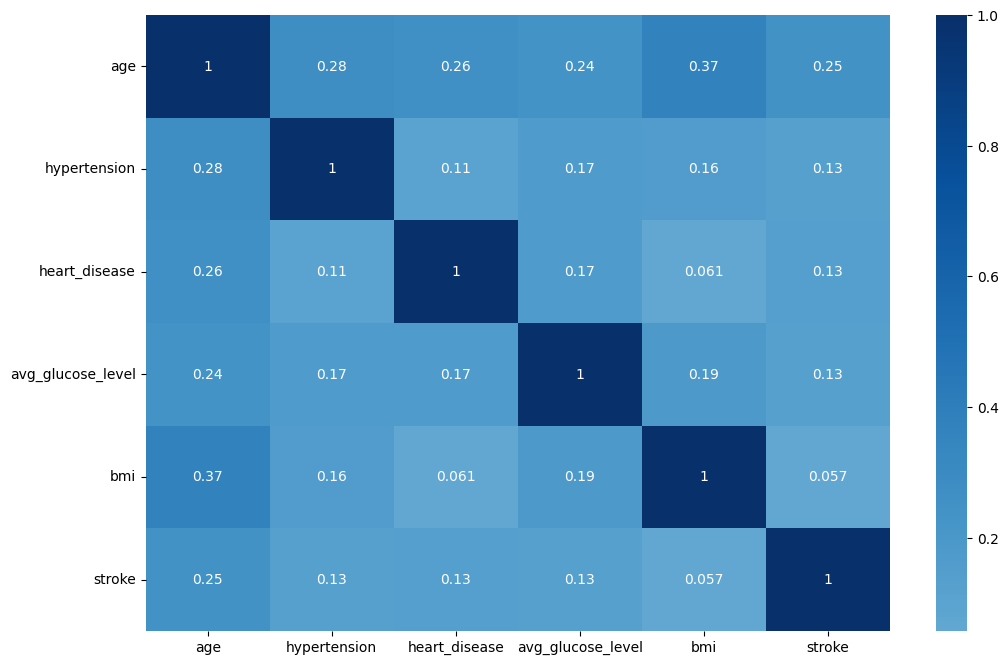

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gaining insights from the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues', annot=True)

plt.show()

In [7]:
## Defining feature vector and target variable

# Drop the target variable
X = df.drop(['stroke'], axis=1)
y = df['stroke']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [8]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, 

((3735, 10), (1246, 10))

In [9]:
# Eliminating erelavant features from the dataset used in the model
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.6:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

set()


In [10]:
# Using label encoder to labelling the object_type data
object_cols = ['gender', 'ever_married','hypertension', 'heart_disease', 'Residence_type','work_type','smoking_status']
num_cols = ['age', 'avg_glucose_level', 'bmi']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in object_cols:
    df[i] = le.fit_transform(df[i])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


### Note for the Label Encoder 
### Gender: Male(1) , Female(0)
### ever_married: Yes(1), No(0)
### Residence_type: Urban(1), Rural(0)
### smoking_status: Unknown(0), formerly smoked(1), never smoked(2), smokes(3)
### work_type: Govt_job(0), Private(1), self_employeed(2), Children(3)

[]

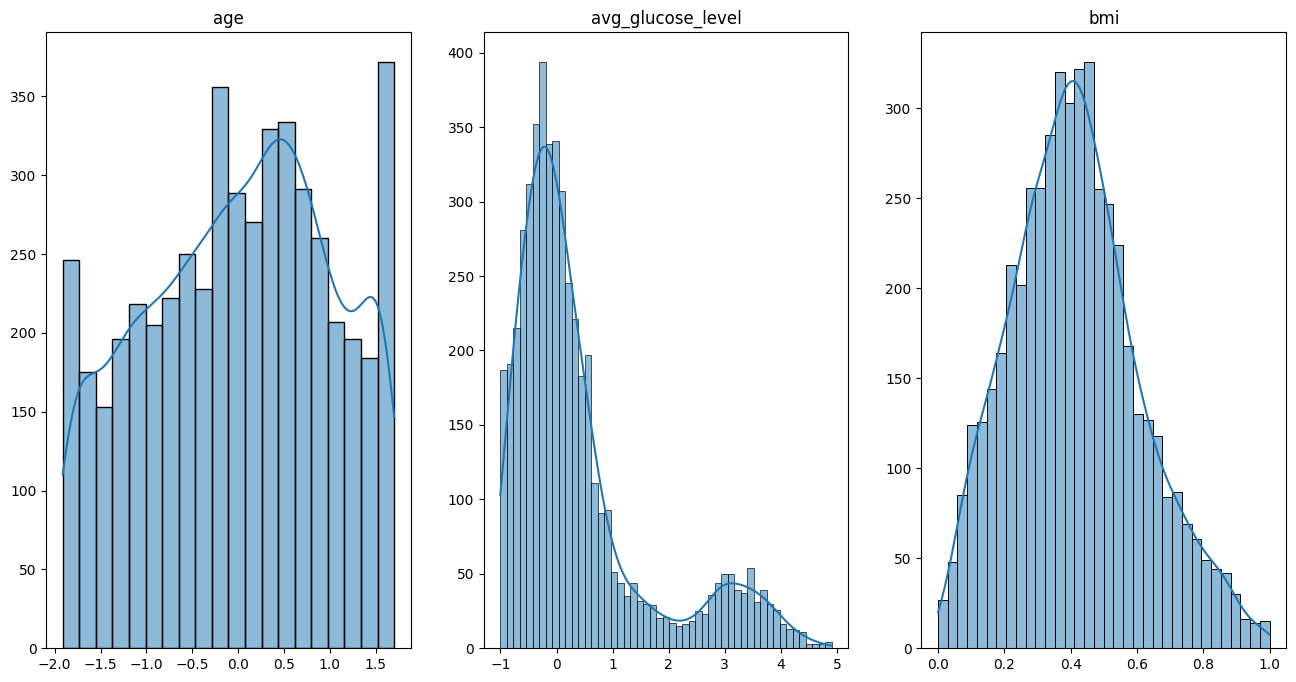

In [11]:
# Rescale the numerical data
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
mm = MinMaxScaler()
rs = RobustScaler()
ss = StandardScaler()

df['age'] = ss.fit_transform(df[['age']])
df['bmi'] = mm.fit_transform(df[['bmi']])
df['avg_glucose_level'] = rs.fit_transform(df[['avg_glucose_level']])

# Plot the distribution of the data after rescale
plt.figure(figsize = (16, 8))
idx = 0
for i in num_cols:
    plt.subplot(1,3,idx+1)
    sns.histplot(x = df[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx+=1
    
plt.plot()

In [13]:
# Split the data into train and test:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['stroke'])
y = df['stroke']
s1=SMOTE()

x_data,y_data=s1.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state = 37)

print(x_train.shape, x_test.shape)

(6626, 10) (2840, 10)


In [14]:
# Import sklearn model and check the accuracy of each model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [16]:
result = dict()

def check_model(model_name, hypers):
    model = str(model_name).split('(')[0]
    gridmodel = GridSearchCV(estimator = model_name, param_grid=hypers, cv = 10, return_train_score=True)
    gridmodel.fit(x_train, y_train)
    ypred = gridmodel.predict(x_test)
    time = np.mean(gridmodel.cv_results_['mean_fit_time'] + gridmodel.cv_results_['mean_score_time']) * gridmodel.n_splits_ * len(gridmodel.cv_results_['mean_fit_time'])
    print(f'By model {model}, with parameters of {gridmodel.best_params_}')
    print(f'It took {time} senconds and the accuracy of {np.round(gridmodel.best_score_ *100, 2)}%')
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_matrix(y_test, ypred), annot = True, fmt = 'd', cmap = 'Greens', cbar = False).set_title(f'Confusion matrix for {model}', fontsize = 10)
    plt.show()
    result[model] = (gridmodel.best_score_)

By model LogisticRegression, with parameters of {'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga', 'tol': 10}
It took 26.148842811584476 senconds and the accuracy of 77.77%


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2080 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    r

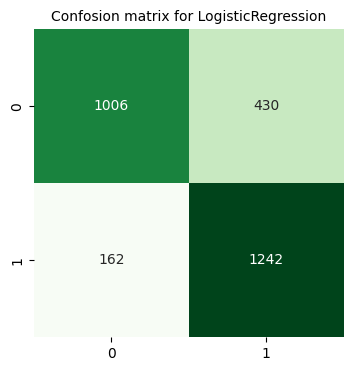

In [17]:
# check the accuracy for Logistic Regression

params_dict = {'penalty' : ('l1', 'l2', 'elasticnet'), 
               'tol': (.0001, .001, .01, .1, 1, 10, 20, 50), 
               'solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 
               'multi_class': ('auto', 'ovr', 'multinomial') }

check_model(LogisticRegression(max_iter=500), params_dict)

By model SVC, with parameters of {'kernel': 'rbf', 'tol': 1e-05}
It took 135.08594846725464 senconds and the accuracy of 80.53%


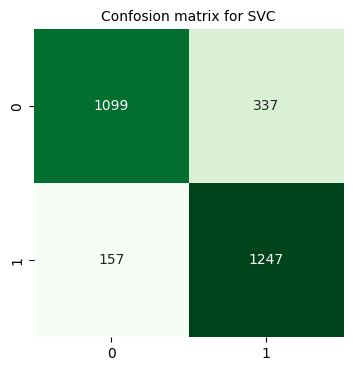

In [18]:
params_dict = {'kernel': ('linear', 'poly', 'rbf'),
               'tol': (1e-5, 1e-4, 1e-3, 1e-2, 1e-1)}

check_model(SVC(max_iter = -1, gamma = 'scale'), params_dict)

By model KNeighborsClassifier, with parameters of {'algorithm': 'auto', 'n_neighbors': 5}
It took 7.958738565444946 senconds and the accuracy of 86.82%


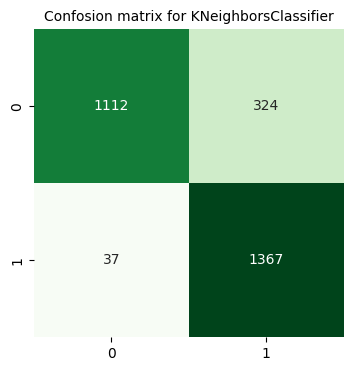

In [19]:
params_dict = {'n_neighbors': (5, 10, 15, 20),
               'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute')}

check_model(KNeighborsClassifier(p = 1), params_dict)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

By model MLPClassifier, with parameters of {'activation': 'tanh', 'solver': 'lbfgs'}
It took 382.623596906662 senconds and the accuracy of 87.17%


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


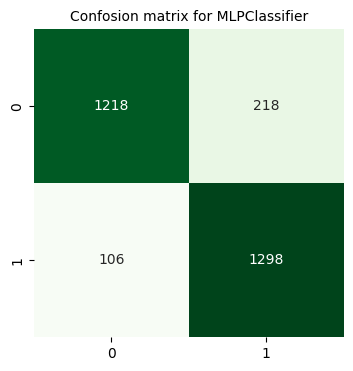

In [20]:
params_dict = {'activation': ('identity', 'logistic', 'tanh', 'relu'),
               'solver' : ('lbfgs', 'sgd', 'adam')}

check_model(MLPClassifier(), params_dict)

By model DecisionTreeClassifier, with parameters of {'criterion': 'entropy', 'splitter': 'best'}
It took 0.8120527267456055 senconds and the accuracy of 88.8%


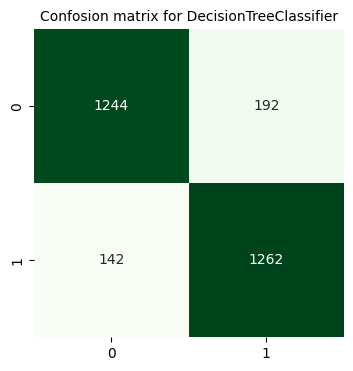

In [22]:
params_dict = {'criterion': ("gini", "entropy"),
               'splitter' : ("best", "random")}

check_model(DecisionTreeClassifier(), params_dict)

c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_

By model RandomForestClassifier, with parameters of {'ccp_alpha': 0.001, 'criterion': 'entropy'}
It took 47.45430827140808 senconds and the accuracy of 89.89%


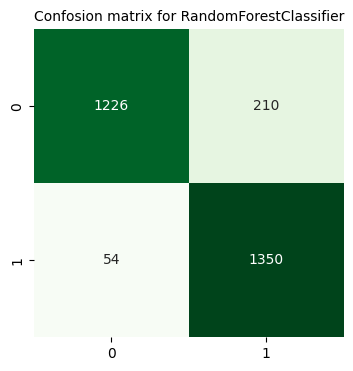

In [23]:
params_dict = {'criterion': ("ni", "entropy"),
               'ccp_alpha' : (.001, .005, .01, .05)}
check_model(RandomForestClassifier(), params_dict)

In [26]:
result

{'LogisticRegression': 0.7776886166969692,
 'SVC': 0.8053066032362282,
 'KNeighborsClassifier': 0.8682421748620432,
 'MLPClassifier': 0.8717210518881036,
 'DecisionTreeClassifier': 0.8880147457542161,
 'RandomForestClassifier': 0.898880170241464}

choose randomforestclassifier as our model

In [31]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()